# Project 1: Language Modeling and Fake Review Classification

I have modified my project to capture the power usage of the NLP assignments made for class. We were directed to use and learn Google colab file structure and implement everything on a cloud based system. This unfortunately obfuscates any attempt to determine the power usage. 

Names: Randy Tang, Cameron Stine

Netids:rt378, crs338


**After you make your own copy, please rename this notebook by clicking on it's name in the upper left corner.** It should be named: CS4740_FA21_p1_netid1_netid2

Don't forget to share your newly copied notebook with your partner!

**Reminder: both of you can't work in this notebook at the same time from different computers/browser windows because of sync issues. We even suggest to close the tab with this notebook when you are not working on it so your partner doesn't get sync issues.**

---



## Introduction
In this project we will build an **n-gram-based language model** for deceptive review classification. We will also investigate a feature-based **Naive Bayes model**. The task we are faced with is to **decide whether a hotel review is deceptive or truthful**. This is a relavent problem as websites that contain consumer reviews are a target of opinion spam. Typically, these deceptive opinions are neither easily ignored nor even identifiable by a human reader so we'd like to assist in flagging reviews. The dataset we are investigating looks at *deceptive opinion spam*, that is decetive opinions that have been purposely written to sound genuine ([Ott et al](https://arxiv.org/pdf/1107.4557.pdf)).

To help us approach this problem, we will use NLP techniques covered thus far to frame this as a (supervised) binary classification task, where each opinion will have a label $y \in \{0,1\}$, where *0 indicates a truthful review* and *1 indicates a deceptive one*. You will train and validate your two different models and then run them on a test data set with hidden $y$ labels. You will then submit the results on the test data set to Kaggle to participate in our class-wide competition!

The project is divided into six parts:
1. Dataset loading and preprocessing
2. Unsmoothed n-gram language model (LM): build the unsmoothed n-gram language model using our Fake Review corpus. 
3. Smoothed n-gram language model: build a smoothed version of the model from part 2.
4. Perplexity: compute perplexity for both the unsmoothed and smoothed model
5. Putting everything together and submitting the first model to Kaggle
6. Naive Bayes: build a feature-based Naive Bayes model to perform the same classification task. Compare the LM with Naive Bayes and identify the pros and cons of each.

## Logistics (IMPORTANT!)
- You should work in **groups of 2 students**. Students in the same group will get the same grade. Thus, you should make sure that everyone in your group contributes to the project. 
- **Remember to form groups on BOTH CMS and Gradescope** or not all group members will receive grades. You can use make a post on EdStem to find a partner for this project.
- Please complete the written questions of this notebook in a clear and informative way. We have created a template document for you to answer the written questions. This document can be found [here](https://docs.google.com/document/d/11GX5vG8TeHk1F2eakOgbTFaqYl3lfvZf9fYoMUTVGMs/edit?usp=sharing). Please make a copy of this document for yourself and add your names and netids in the header and answer the written questions on it. You will need to submit this document to gradescope as well (do not forget to do this please!).
- At the end: please make sure to submit the following 3 items:
  1. PDF version of Colab notebook on Gradescope (instructions for converting to PDF are at the end).
  2. PDF version of Google Doc with written answers on Gradescope.
  3. .ipynb version of your colab notebook on CMS.

**Advice:** The written questions is where you get to show us that you understand not only what you are doing but also why and how you are doing it. So be clear, organized and concise; avoid vagueness and excess verbiage. Spend time doing error analysis for the models. This is how you understand the advantages and drawbacks of the systems you build. It's also useful to think about how the theory of n-grams/Naive Bayes bridges with the real world application we are building. Think about what you expect from these models based on your current understanding, and then see if your expectation aligns with empirical results that you'll get. 

## General Guidelines
In this project, we provide a few code snippets or starter points in case you need them. You DO NOT need to follow the structure. 

If you think you have a better idea, go for it. You can ADD, MODIFY, or DELETE any code snippets given to you.

You are expected to use functions or classes to organize your code. A portion of the grade is regarding code cleanliness / readability and applying these models in the real world means we need to collaborate with others (ie. other people should be able to read your code and run it)!

To help with debugging and testing, you should use this example from class [09-02 Thurs - lec3: N-gram models](https://edstem.org/us/courses/12801/resources) as your training corpus:

```
<s> I see what I eat and I eat what I see.
```

The test sentence you can use also comes from class:
```
I see what
```

**Let's do this** 🚀

### Dataset

You are given a **Review Corpus** on CMS, which consists of roughly the same amount of real and fake reviews.

Real review example:
```
Stayed with a group for a bachelorette party, and was disappointed. The hotel is beautiful, the staff was all rather friendly. The main problem was the room/sleeping situation. We had booked rooms with 2 queen beds several weeks before, but received an email a few days before our visit stating they were sold out (how that happens I don't know!!) so they "upgraded" us to two "suites" with a king and a pull out. First, this meant our party was split up and on different floors. Second, that meant two of us were stuck on a pull out couch. :( I'm not a picky, unreasonable person, but that was the WORST "bed" I've ever slept on! It was sunken in the middle so we literally rolled into each other unless we balanced ourselves on the very edge of the bed. Then there were the springs poking into our backs ALL night! Just awful! For the amount of money we spent I expected to be comfortable! I would not stay here again after this experience.
```

Fake review example:
```
I truly enjoyed my stay at the Omni Chicago Hotel. We stayed in a suite, which was clean and extremely nice, at a very reasonable rate. My husband and I spent quite a bit of time in the indoor pool, but personally I preferred laying out on the sundeck. Service was excellent; they were friendly and all of our needs were met promptly. I would definitely recommend this hotel to anyone looking to have a great experience in the downtown Chicago area.
```

In the dataset folder you should find 2 files, training and validation splits for both real and fake reviews.

The project will proceed generally as follows in terms of code development:
1. Write code to train unsmoothed unigram and bigram language models for an arbitrary corpus
2. Implement smoothing and unknown word handling. 
3. Implement the Perplexity calculation. 
4. Using 1, 2 and 3, together with the provided training and validation sets, develop a language-model-based approach for Fake Review Classification.
5. Apply your best language-model-based review classifier (from 4) to the
provided test set. Submit the results to the online Kaggle competition. 
6. Use any existing implementation of Naive Bayes (and the provided training and validation sets) to create an additional Naive Bayes fake review classifier. Apply your best NB classifier to the provided test set. Submit the results to the separate Kaggle competition (for NB classifiers). 

We will progress towards these tasks throughout this notebook.

# Part 1: Preprocessing the Dataset
In this part, you are going to do a few things:
* Connect to the google drive where the data set is stored
* Load and read files
* Preprocess the text

------
**Please upload the dataset to each partner's individual Google Drive now.** We suggest using the same folder structure within Google Drive because the notebook is shared among you, so the code to load the data would have to be changed every time if folder structures are different. One folder structure might be: Google Drive/CS 4740/Project 1/Dataset/ or whatever works for you. See our code below for an example of how we load the data from Google Drive.

## 1.1 Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## 1.2 Load and read files
First, let's install [NLTK](https://www.nltk.org/), a very widely package for NLP preprocessing (and other tasks) for Python.

Then we read and load data.

In [2]:
import pyRAPL

pyRAPL.setup()
measure = pyRAPL.Measurement('bar')
measure.begin()

In [3]:
import os
import csv
import io
from nltk import word_tokenize, sent_tokenize
import nltk
from tqdm.notebook import tqdm

"""nltk.download('punkt')

root_path = os.path.join(os.getcwd(), "drive", "MyDrive/Colab Notebooks") #os.path.join(os.getcwd(), "drive", "My Drive/Colab Notebooks") # replace based on your Google drive organization
dataset_path = os.path.join(root_path, "4740_p1_dataset")# os.path.join(root_path, "4740_p1_dataset") # same here
"""

real_review_train = []
real_review_validation = []
fake_review_train = []
fake_review_validation = []

def load_real_fake_dataset( filename):
    real = []
    fake = []
    with open( filename) as fp:
        csvreader = csv.reader(fp, delimiter="|")
        for txt, label in csvreader:
            label = int(label)
            if label:
                fake.append(txt)
            else:
                real.append(txt)
    
    return real, fake


real_review_train, fake_review_train = load_real_fake_dataset("P1_real_fake_review_train.txt")

real_review_validation, fake_review_validation = load_real_fake_dataset("P1_real_fake_review_val.txt")


def tokenize_reviews(reviews):
    return [
        [
            word.lower() for sent in sent_tokenize(review)
            for word in word_tokenize(sent)
        ]
        for review in tqdm(reviews, leave=False)
    ]


tokenized_real_review_training = tokenize_reviews(real_review_train)
tokenized_fake_review_training = tokenize_reviews(fake_review_train)
tokenized_real_review_validation = tokenize_reviews(real_review_validation)
tokenized_fake_review_validation = tokenize_reviews(fake_review_validation)

  0%|          | 0/642 [00:00<?, ?it/s]

  0%|          | 0/638 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

In [4]:
def load_test_dataset(filename):
    reviews = []
    with open( filename) as fp:
        contents = fp.readlines()
        #take off beginning until ", take off last character (")
        rowNum = 0
        for review in contents:
            if rowNum == 0:
              rowNum = rowNum+1
              continue
            
            idx = 0
            while review[idx] != "\"":
              idx = idx +1
            review = review[idx+1:len(review)-2]

            reviews.append(review)
            rowNum = rowNum+1
    
    return reviews

reviews_test = load_test_dataset( "P1_real_fake_review_test.txt")
tokenized_reviews_test = tokenize_reviews(reviews_test)

  0%|          | 0/160 [00:00<?, ?it/s]

Sanity checks for our real and fake training sets

## 1.3 Data Preprocessing & Preparation

There's a well-known parable in machine learning that 80% of the work is all about data preparation, 10% is supporting infrastructure and 10% is actual modeling. If your "raw" dataset is not preprocessed and prepared in a way to maximize its value, then your model will be more like this: https://xkcd.com/1838/. For this project, modeling is the star of the show for learning purposes, but we still want you to pay attention to the preprocessing stage.

*We've already tokenized and lowercased* the raw data for you. We have not added a start of sentence token but feel free to do so (it is not neccessary). Here are a few extra things you might want to do:

- Think about edge cases. For example, you don't want to accidentally append a period to the last word of a sentence. 
- Watch out for apostrophes and other tricky things like quotations, they cause lots of edge cases. For example, "they're" can be all one token, or two tokens ("they", "'re") or even three tokens ("they", " ' ", "re"). 

Why did we lowercase all tokens? Because the computer will otherwise consider "The" and "the" as two separate words and this will cause problems.

Note that you may use existing
tools just for the purpose of preprocessing. 

Advice: don't get bugged down in the dozens of preprocessing packages and suggestions that you can find on Towards Data Science or Stack Overflow. Start with this [NLTK tutorial](https://lost-contact.mit.edu/afs/cs.pitt.edu/projects/nltk/docs/tutorial/introduction/nochunks.html#:~:text=The%20Natural%20Language%20Toolkit%20(NLTK,tokenization%2C%20tagging%2C%20and%20parsing.) and that should be plenty.

In [7]:
# TODO: preprocessing
#edge cases: "" marks, dates (2/17), contractions ("n't"? remove or keep or turn into "not"), ...
#, some periods not correctly preprocessed (no space in between, ex. "like.he")
#add start tokens after periods. "<s>", remove plurals (words -> word)
#ignore periods/punctuation? maybe
# TODO: preprocessing
import numpy as np

def add_start(text):
  #function adds start tokens to begining of sentences and to the start of the review
  numpyset=np.array(text,dtype='object')
  filler=[]
  start_token=np.array(filler)
  for index in range(len(numpyset)):
    review=numpyset[index]
    empty=[]
    #parsing the review for start locations. 
    for wordind in range(len(review)):
      word=review[wordind]
      if wordind ==0:
        empty.append('<s>')
        empty.append(word)

      if word=='.' or word=='!' or word=='?':
        empty.append(word)
        
        empty.append('<s>')
      else:
        empty.append(word)
      
    filler.append(empty)
  return filler

def concat_poss(text):
  #function concatenates possessives into one token
  numpyset=np.array(text,dtype='object')
  filler=[]
  spark=np.array(filler)
  for index in range(len(numpyset)):
    review=numpyset[index]
    empty=[] 
    for wordind in range(len(review)):
      word=review[wordind]
      if word =='\'s':
        temp=review[wordind-1]+word
        
        empty.pop()

        empty.append(temp)
      else:
        empty.append(word)
      
    filler.append(empty)
  return filler
def replace_not(text):
  #function replaces the token n't with not
  numpyset=np.array(text,dtype='object')
  filler=[]
  spark=np.array(filler)
  for index in range(len(numpyset)):
    review=numpyset[index]
    empty=[]
    for wordind in range(len(review)):
      word=review[wordind]
      if word=='can\'t':
        empty.append('cannot')
        
      if word =='n\'t':
        temp='not'
        if review[wordind-1] =='can':
          temp='cannot'
          empty.pop()
          empty.append(temp)
          
        else:
          empty.append(temp)
          
      else:
        empty.append(word)
      
    filler.append(empty)
  return filler
import re
def concat_conju(text):
  #function adds together conjunctions
  numpyset=np.array(text,dtype='object')
  filler=[]
  spark=np.array(filler)
  for index in range(len(numpyset)):
    review=numpyset[index]
    empty=[]
    for wordind in range(len(review)):
      word=review[wordind]
      if re.match(r'^\'\d',word):
        empty.append(word)
      elif re.match(r'^\'\w+',word) and len(word)<=3:
        prevword=review[wordind-1]
        if word[0]=="\'" and wordind!=0 and word[1]!="\'" and re.match(r'\w+',prevword):
          temp=review[wordind-1]+word
          
          empty.pop()
          empty.append(temp)
      else:
        empty.append(word)
      
    filler.append(empty)
  return filler

def split_periods(text):
  #function adds start tokens to begining of sentences and to the start of the review
  numpyset=np.array(text,dtype='object')
  filler=[]
  start_token=np.array(filler)
  for index in range(len(numpyset)):
    review=numpyset[index]
    empty=[]
    #parsing the review for start locations. 
    for wordind in range(len(review)):
      word=review[wordind]
      for it in range(len(word)):
        char=word[it]
        #most of the words were under 4 characters in length that included periods, this also prevented words like tv
        if not re.match(r'[.]',word) and len(word) >4 and not re.findall(r'.com',word) and not re.findall(r'\d',word):
          if re.match(r'[.]',char) and len(word)>1:
            
            empty.append(word[0:it])
            empty.append(word[it])
            empty.append(word[it+1:])
      else:
        empty.append(word)
      
    filler.append(empty)
  return filler      

In [8]:
tokenized_reviews_test=concat_poss(replace_not(concat_conju(add_start(split_periods(tokenized_reviews_test)))))

In [9]:
tokenized_fake_review_training=concat_poss(replace_not(concat_conju(add_start(split_periods(tokenized_fake_review_training)))))

In [10]:
tokenized_fake_review_validation=concat_poss(replace_not(concat_conju(add_start(split_periods(tokenized_fake_review_validation)))))

In [11]:
tokenized_real_review_training=concat_poss(replace_not(concat_conju(add_start(split_periods(tokenized_real_review_training)))))

In [12]:
tokenized_real_review_validation=concat_poss(replace_not(concat_conju(add_start(split_periods(tokenized_real_review_validation)))))

**Q1.1: Show some observations or statistics from the dataset** (should be quantitative – i.e. most frequent words, most frequent bigram, etc.) You may do the computations for your graphs/statistics on the colab notebook, however, please mmake sure you transfer all your work (statistics, graphs, snapshots of thh code if needed) to the Google Doc!

Please answer on your writeup doc!

In [15]:
#I used routines from courses.cit.cornell.edu/info3950_2021sp/lec16_sty.ipynb
from collections import Counter, defaultdict

real_review_vocab = defaultdict(lambda: .5)
for review in tokenized_real_review_training:
  for word in review:
    real_review_vocab[word] += 1
Counter(real_review_vocab).most_common(10)

[('<s>', 7248.5),
 ('the', 6556.5),
 ('.', 5849.5),
 (',', 3610.5),
 ('and', 3193.5),
 ('a', 2790.5),
 ('to', 2588.5),
 ('was', 2309.5),
 ('i', 2113.5),
 ('in', 1550.5)]

In [16]:
fake_review_vocab = defaultdict(lambda: .5)
for review in tokenized_fake_review_training:
  for word in review:
    fake_review_vocab[word] += 1
Counter(fake_review_vocab).most_common(10)

[('<s>', 6511.5),
 ('the', 6390.5),
 ('.', 5189.5),
 (',', 3375.5),
 ('i', 3251.5),
 ('and', 3126.5),
 ('to', 2814.5),
 ('was', 2538.5),
 ('a', 2420.5),
 ('in', 1588.5)]

In [17]:
corpus=[]
real_features=[]
for review in tokenized_fake_review_training:
  corpus.append(review)
for review in tokenized_real_review_training:
  corpus.append(review)

In [18]:
review_vocab = defaultdict(lambda: .5)
for review in tokenized_real_review_training :
  for word in review:
    review_vocab[word] += 1
for review in tokenized_real_review_training:
  for word in review:
    review_vocab[word] += 1

In [19]:
unigram_graph=Counter(review_vocab).most_common(50)

In [20]:
top_50=[]
for i in range(len(unigram_graph)):
  top_50.append(unigram_graph[i][0])

In [22]:
#courses.cit.cornell.edu/info3950_2021sp/lec16_sty.ipynb
unigram_graph_real=[]
for review in tokenized_real_review_training:
  review_count =Counter(review)
  unigram_graph_real.append([review_count[word] for word in top_50])
unigram_graph_real = np.array(unigram_graph_real).astype(np.float64)

In [24]:
#courses.cit.cornell.edu/info3950_2021sp/lec16_sty.ipynb
unigram_graph_fake=[]
for review in tokenized_fake_review_training:
  review_count =Counter(review)
  unigram_graph_fake.append([review_count[word] for word in top_50])
unigram_graph_fake = np.array(unigram_graph_fake).astype(np.float64)

In [30]:
import matplotlib.pyplot as plt

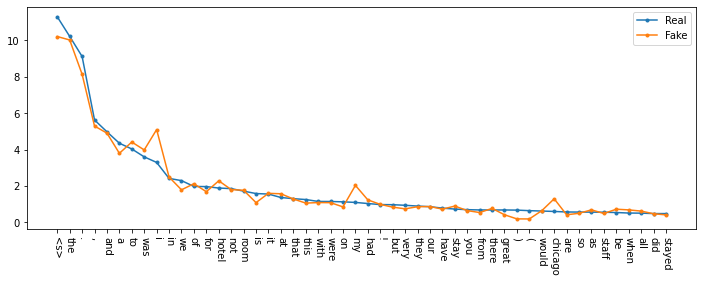

In [31]:
plt.figure(figsize=(12,9))
plt.subplot(212)
plt.plot(unigram_graph_real.mean(0), '.-', label='Real') #real blocks in blue
plt.plot(unigram_graph_fake.mean(0), '.-', label='Fake')
plt.xticks(range(50), top_50, rotation=270)
plt.legend()
plt.show()

In [32]:
# Bigram creator implemented below in order to show quantative results of data. 
def review_bigram_count(lst):
  bigrams = {}
  for i in range(len(lst)-1):
    bigram = (lst[i],lst[i+1])
    if bigram in bigrams:
      count = bigrams[bigram]
      bigrams[bigram] = count+1
    else:
      bigrams[bigram] = 1
  return bigrams

def corpus_bigram_count(corpus):
  bigrams = {}
  for lst in corpus:
    for i in range(len(lst)-1):
      bigram = (lst[i],lst[i+1])
      if bigram in bigrams:
        count = bigrams[bigram]
        bigrams[bigram] = count+1
      else:
        bigrams[bigram] = 1
  return bigrams

In [34]:
Counter(corpus_bigram_count(tokenized_real_review_training)).most_common(10)

[(('.', '<s>'), 5849),
 (('<s>', 'the'), 1225),
 (('<s>', 'i'), 810),
 (('!', '<s>'), 627),
 (('<s>', 'we'), 544),
 (('in', 'the'), 502),
 (('the', 'hotel'), 482),
 ((',', 'and'), 441),
 (('of', 'the'), 422),
 (('at', 'the'), 385)]

In [35]:
Counter(corpus_bigram_count(tokenized_fake_review_training)).most_common(10)

[(('.', '<s>'), 5189),
 (('<s>', 'the'), 1183),
 (('<s>', 'i'), 1073),
 (('!', '<s>'), 630),
 (('at', 'the'), 516),
 ((',', 'and'), 497),
 (('in', 'the'), 468),
 (('of', 'the'), 444),
 (('the', 'hotel'), 438),
 (('i', 'was'), 434)]

In [37]:
corpus=[]
for review in tokenized_fake_review_training:
  corpus.append(review)
for review in tokenized_real_review_training:
  corpus.append(review)
top_50_bigram=Counter(corpus_bigram_count(corpus)).most_common(50)

In [38]:
bigrams=[]
for entry in top_50_bigram:
  
  bigrams.append(entry[0])

In [40]:
bigram_graph_real=[]
for review in tokenized_real_review_training:

  review_count =Counter(review)
  real=review_bigram_count(review)
  temp=np.zeros(50)
  for i in range(len(bigrams)):
    for key in list (real.keys()):
      if key == bigrams[i]:
        temp[i] +=real[key]
    
  bigram_graph_real.append(temp)
    

bigram_graph_real = np.array(bigram_graph_real).astype(np.float64)

In [42]:
bigram_graph_fake=[]
for review in tokenized_fake_review_training:

  review_count =Counter(review)
  fake=review_bigram_count(review)
  temp=np.zeros(50)
  for i in range(len(bigrams)):
    for key in list (fake.keys()):
      if key == bigrams[i]:
        temp[i] =+ fake[key]
    
  bigram_graph_fake.append(temp)
    

bigram_graph_fake = np.array(bigram_graph_fake).astype(np.float64)

In [43]:
#courses.cit.cornell.edu/info3950_2021sp/lec16_sty.ipynb
"""plt.figure(figsize=(12,9))
plt.subplot(212)
plt.plot(bigram_graph_real.T, '.-', label='Real') #real blocks in blue
plt.plot(bigram_graph_fake.T, '.-', label='Fake')
plt.xticks(range(50), bigrams, rotation=270)
plt.legend()
#plt.show()"""

"plt.figure(figsize=(12,9))\nplt.subplot(212)\nplt.plot(bigram_graph_real.T, '.-', label='Real') #real blocks in blue\nplt.plot(bigram_graph_fake.T, '.-', label='Fake')\nplt.xticks(range(50), bigrams, rotation=270)\nplt.legend()\n#plt.show()"

**Please answer the following question**:

**Q1.2: What did you do in your preprocessing part?**

Example answer format:

A: We tokenized and lowercased all the words.

Please answer on your writeup doc!

# Part 2: Compute Unsmoothed Language Models.

To start, you will write a program that computes unsmoothed unigram and bigram probabilities. You should consider real and deceptive reviews as separate corpora and
generate a separate language model for each set of reviews.
We have already loaded the data and (partially) preprocessed it and you probably did some of your own preprocessing. 

Note that you were allowed to use existing
tools for the purpose of preprocessing, but you must write the code for gathering n-gram counts and computing n-gram probabilities yourself. 

For example, consider the
simple corpus consisting of the sole sentence:


> the students liked the class

Part of what your program would compute for a unigram and bigram model, for example,
would be the following:


> $P("the") = 0.4; P("liked") = 0.2; P("the"|"liked") = 1.0; P("students"|"the") = 0.5$

Remember to add a symbol to mark the beginning of sentence. See Sept. 2nd lecture, p25-28 for an example.




**Advice**: jupyter notebooks (including colab) can be a double-edged sword. It's amazing and liberating to just start writing code and run it by simply running a cell. However, it gets messy very quickly. So, once you're done prototyping, you should be using functions (classes may be unnecessary but go for it if you want) to make things cleaner and easier to debug.

## 2.1 Unsmoothed Uni-gram Model.

In this part of the project, you are trying to compute the probabilities for a unigram model. You might want to take in a list of words, and return the probabilities for each
occurence. Think of an efficient data structure to use here given what ratio of reads and puts you expect.

Please look at the example above and consider how we get the probabilities.

Below is a starter point you can go from, but you DO NOT need to stick it. Feel free to use your own design.

In [44]:
"""
Reference code for start. You do not need to follow this.
Function [unsmoothed_unigram] computes the probabilities for a unigram model
lst: a list of words in a sentence
Return: [data structure of your choice] that stores the result
"""
#stores number of occurences of each unigram (not probability) for consistency 
#reasons. can compute probabilities later.
#divide uni count by sum of counts in dictionary to get prob.
def review_unigram_count(lst):
  # TODO
  unigrams = {}
  for word in lst:
    if word in unigrams:
      count = unigrams[word]
      unigrams[word] = count+1
    else:
      unigrams[word] = 1
  return unigrams

def corpus_unigram_count(corpus):
  unigrams = {}
  for review in corpus:
    for word in review:
      if word in unigrams:
        count = unigrams[word]
        unigrams[word] = count+1
      else:
        unigrams[word] = 1
  return unigrams

In [45]:
#review_unigram_count(tokenized_fake_review_training[0])

In [46]:
#corpus_unigram_count(tokenized_fake_review_training)

## 2.2 Unsmoothed Bi-gram Model.

In this part of the project, you are trying to compute the probabilities for a bigram model. You can approach this with similar methods as above.

Remember the definition:
$p(w_n\mid w_{n-1})=\frac{C(w_{n-1}w_n)}{C(w_{n-1})}$ this means you might want to store two things (count of $w_{n-1}$ and count of $w_{n-1}w_n$).

In [47]:
# TODO: Add code for bigram probability calculation. 
#bigram counts only. can combine with unigram count prev for probability calculation
#not adding unseen bigrams. deal with later when evaluating
def review_bigram_count(lst):
  bigrams = {}
  for i in range(len(lst)-1):
    bigram = (lst[i],lst[i+1])
    if bigram in bigrams:
      count = bigrams[bigram]
      bigrams[bigram] = count+1
    else:
      bigrams[bigram] = 1
  return bigrams

def corpus_bigram_count(corpus):
  bigrams = {}
  for lst in corpus:
    for i in range(len(lst)-1):
      bigram = (lst[i],lst[i+1])
      if bigram in bigrams:
        count = bigrams[bigram]
        bigrams[bigram] = count+1
      else:
        bigrams[bigram] = 1
  return bigrams

In [48]:
#review_bigram_count(tokenized_fake_review_training[0])

In [49]:
#corpus_bigram_count(tokenized_fake_review_training)

**Please answer the following question**:

**Q2: What data structure are you using to store probabilities for unigrams and bigrams? Why did you select this data structure?**

Please answer on your writeup doc!

# Part 3: Smoothed Language Model
In this part, you will need to implement **at least one** smoothing method and **at least one** method to handle unknown words in the test data. You can choose any method(s) that you want for each. You should make clear
**what method(s)** were selected and **why**, providing a description for any non-standard approach (e.g., an approach that was not covered in class or in the readings). 

You should use the
provided validation sets to experiment with different smoothing/unknown word handling
methods if you wish to see which one is more effective for this task. (We will cover this in Part 4).

## 3.1 Unknown Words Handling

**Please answer the following questions:**

**Q3.1: How are you going to handle unknown words? What parameters might be needed? Do you need a method to determine the value?**

Please answer on your writeup doc!


In [50]:
# TODO: Add your unknown word handling code 
# naive unks in bigrams: ignore in numerator (assume count 0 or smoothing)
# if unk in denominator of bigram, top is also unk -> approximate prob of bigram as k/(k*V)
# conclude: ignore unks for bigrams/deal with them 

#process: training set -> tokenize/preprocess -> dictionary of unigram counts(raw)
# -> add unk key into dictionary -> then smooth counts

#or: ignore unks, if encounter unk handle with smoothing (p(unk) = k/(#tokens + k*V))
#issue: this doesn't preserve probability mass(??)
import random

#method 1: keep k most common words in vocab, all else are <UNK>
def unkify_k_most(unigram_dict, k):
  unk_dict = {}
  unk_dict["<UNK>"] = 0
  common_tokens = sorted(unigram_dict, key=unigram_dict.get, reverse=True)
  wordsAdded = 0
  for token in common_tokens:
    if wordsAdded < k:
      unk_dict[token] = unigram_dict[token]
    else:
      unk_dict["<UNK>"] = unk_dict["<UNK>"] + unigram_dict[token]
    wordsAdded = wordsAdded+1
  return unk_dict

#method 2: replace some proportion k of words with <unk>
def unkify_k_portion(unigram_dict, k):
  unk_dict = {}
  unk_dict["<UNK>"] = 0
  for key in unigram_dict:
    count = unigram_dict[key]
    #subtract 1 count from key and add to <UNK>, with probability k
    if random.random() <= k:
      if count > 1:
        unk_dict[key] = count - 1
        unk_dict["<UNK>"] = unk_dict["<UNK>"]+1
      else: #if new key count = 0, dont bother putting it in new dictionary
        unk_dict["<UNK>"] = unk_dict["<UNK>"]+1
    else:
      unk_dict[key] = count
  
  return unk_dict


In [51]:
test_dict = review_unigram_count(tokenized_fake_review_training[0])
#sorted(test_dict, key=test_dict.get, reverse=True)

In [52]:
test_dict
unk_dict_uni = unkify_k_portion(test_dict,0.05)
print(unk_dict_uni)

{'<UNK>': 8, '<s>': 17, 'the': 22, 'talbott': 1, 'hotel': 5, 'claims': 2, 'to': 17, 'be': 1, "chicago's": 1, 'premiere': 1, 'small': 2, 'luxury': 1, '.': 15, 'after': 2, 'staying': 1, 'there': 2, 'and': 11, 'experiencing': 1, 'service': 2, ',': 11, 'environment': 1, 'in': 5, 'i': 11, 'can': 1, 'say': 1, 'with': 3, 'confidence': 1, 'that': 2, 'this': 2, 'just': 1, 'not': 5, 'true': 1, 'arrived': 3, 'rather': 1, 'high': 1, 'expectations': 1, 'due': 1, 'made': 1, 'by': 1, 'some': 2, 'of': 4, 'reviews': 1, 'posted': 1, 'on': 1, 'their': 1, 'website': 1, 'was': 10, 'immediately': 1, 'disappointed': 2, 'no': 1, 'one': 1, 'came': 2, 'my': 7, 'car': 1, 'collect': 1, 'bags': 2, 'forced': 2, 'lug': 1, 'them': 2, 'inside': 2, 'myself': 1, 'doorman': 1, 'polite': 1, 'but': 1, 'failed': 1, 'open': 1, 'door': 1, 'for': 3, 'me': 3, 'leaving': 2, 'while': 2, 'trying': 1, 'carry': 1, 'once': 2, 'atmosphere': 1, 'what': 1, 'expected': 1, 'lighting': 1, 'poor': 1, 'lobby': 1, 'dark': 1, 'it': 4, 'looked'

In [53]:
#unkify_k_most(test_dict,150)

## 3.2 Smoothing

In this part of project, we are going to compute the probabilities for unigram and bigram models after smoothing.
There are several smoothing methods you can start with:
* add-k
* Kneser-Ney
* Good-Turing
* ...

You need to compute for both unigram and bigram models.

Below is a starter point using add-k smoothing. As always, you DO NOT need to follow it; you do need to implement add-k smoothing however feel free to implement any other smoothing methods you'd like and use those for later parts of the assignment!

In [54]:
"""
Reference code for add-k smoothing on unigram model.
dic: a dictionary of your unigrams. key: words, val: occurence
k: parameter k for smoothing
Return: a dictionary of results after smoothing
"""
#return probabilities, not counts
def add_k_unigram(dic, k):
  # TODO
  counts = dic.values()
  totalTokens = sum(counts)
  V = len(dic)

  probDict = {}
  for key in dic:
    probDict[key] = (dic[key]+k)/(totalTokens + k*V)
  
  return probDict


In [55]:
"""
Reference code for add-k smoothing on bigram model.
uni_dic: a dictionary of your unigrams.
bi_dic: a dictionary of your bigrams.
k: parameter k for smoothing
Return: a dictionary of results after smoothing
"""
#only stores seen bigrams, assume unk/unseen bigrams have smoothed prob k/(#unk+k*V) (?? not sure)
def add_k_bigram(uni_dic, bi_dic, k):
  # TODO
  V = len(uni_dic)
  probDict = {}
  for key in bi_dic:
    probDict[key] = (bi_dic[key]+k)/(uni_dic[key[0]] + k*V)
  return probDict

In [56]:
test_dict_uni = review_unigram_count(tokenized_fake_review_training[0])
test_dict_bi = review_bigram_count(tokenized_fake_review_training[0])

#add_k_unigram(unk_dict_uni,0)

In [57]:
#add_k_bigram(test_dict_uni,test_dict_bi,0.1)

**Please answer the following question:**

**Q3.2: Which smoothing method did you choose? Are there any parameters, if so how are you planning to pick the value? If you choose to implement more than 1 method (not a requirement), please state each of them. Providing a description for any non-standard approach, e.g., an approach that was not covered in class or in the readings**

Please answer on your writeup doc!

# Part 4: Perplexity
At this point, we have developed several language models: unigram vs bigram, unsmoothed vs smoothed. We now want to compare all the models. 

Implement code to compute the perplexity of a **“development set.”** (“Development set”
is just another way to refer to the validation set—part of a dataset that is distinct from
the training portion and the test portion.) Compute and report the perplexity of each
of the language models (one trained on true reviews and fake reviews) on
the development corpora. Compute perplexity as follows:
\begin{align*}
PP &= \left(\prod_i^N\frac{1}{P\left(W_i\mid W_{i-1}, ...W_{i-n+1}\right)}\right)^{\frac{1}{N}}\\
&=\exp \frac{1}{N}\sum_{i}^N-\log P\left(W_i\mid W_{i-1}, ...W_{i-n+1}\right)
\end{align*}
where $N$ is the total number of tokens in the test corpus and $P\left(W_i\mid W_{i-1}, ...W_{i-n+1}\right)$
is the n-gram probability of your model. Under the second definition above, perplexity
is a function of the average (per-word) log probability: use this to avoid numerical
computation errors.

Please complete the following tasks and report what you have observed. Remember, lower perplexity means better model.

## Task 1: Compute perplexity for smoothed unigram and smoothed bigram. 
*Note: If you choose more than one smoothing method, pick one of them to compute. If you need to try different values of parameters, you can try them out here.*


In [58]:
# TODO: compute perplexity for one smoothing method on unigram, and one smoothing method on bigram.
import math
def logprob_uni(uni_count,uni_probs):
  sum_logs = 0
  #uni_count is a dictionary with unigram counts
  for key in uni_count:
    if key in uni_probs:
      sum_logs = sum_logs - uni_count[key]*math.log(uni_probs[key])
    else:
      sum_logs = sum_logs - uni_count[key]*math.log(uni_probs["<UNK>"])
  return sum_logs

def uni_perplexity(uni_count,uni_probs):
  counts = uni_count.values()
  N = sum(counts)
  return math.exp(1/N*logprob_uni(uni_count,uni_probs))

#for any unseen/unknown bigrams, assume same probability as lowest seen probability
#try highest seen probability
def logprob_bi(bi_count,bi_probs):
  key_min = min(bi_probs.keys(), key=(lambda k: bi_probs[k]))
  min_prob = bi_probs[key_min]
  key_max = max(bi_probs.keys(), key=(lambda k: bi_probs[k]))
  max_prob = bi_probs[key_max]
  sum_logs = 0
  for key in bi_count:
    if key in bi_probs:
      sum_logs = sum_logs - bi_count[key]*math.log(bi_probs[key])
    else:
      sum_logs = sum_logs - bi_count[key]*math.log(min_prob)
      #sum_logs = sum_logs - bi_count[key]*math.log(max_prob)
  return sum_logs

def bi_perplexity(bi_count,bi_probs):
  counts = bi_count.values()
  N = sum(counts)
  return math.exp(1/N*logprob_bi(bi_count,bi_probs))


In [59]:
fake_uni_count = corpus_unigram_count(tokenized_fake_review_training)
fake_uni_count_unk005 = unkify_k_portion(fake_uni_count, 0.05)
fake_uni_probs_add1_unk005 = add_k_unigram(fake_uni_count_unk005, 1)
#print(fake_uni_probs_add1_unk005)
real_uni_count = corpus_unigram_count(tokenized_real_review_training)
real_uni_count_unk005 = unkify_k_portion(real_uni_count, 0.05)
real_uni_probs_add1_unk005 = add_k_unigram(real_uni_count_unk005, 1)

review_1_count = review_unigram_count(tokenized_fake_review_validation[0])
review_2_count = review_unigram_count(tokenized_fake_review_validation[5])
logprob_uni(review_1_count,fake_uni_probs_add1_unk005)
logprob_uni(review_2_count,fake_uni_probs_add1_unk005)


757.4084640942478

In [60]:
fake_bi_count = corpus_bigram_count(tokenized_fake_review_training)
#IGNORE UNKS IN BIGRAMS
#fake_bi_count_unk005 = unkify_k_portion(fake_bi_count, 0.05)
#print(fake_bi_count_unk005)
fake_bi_probs_add1 = add_k_bigram(fake_uni_count,fake_bi_count, 0.1)

real_bi_count = corpus_bigram_count(tokenized_real_review_training)
real_bi_probs_add1 = add_k_bigram(real_uni_count,real_bi_count, 0.1)

review_1_bicount = review_bigram_count(tokenized_real_review_validation[2])
#print(logprob_bi(review_1_bicount,fake_bi_probs_add1))
print(bi_perplexity(review_1_bicount,fake_bi_probs_add1))
print(bi_perplexity(review_1_bicount,real_bi_probs_add1))

369.8838760167496
347.5294943939175


In [61]:
fake_uni_count_validation = corpus_unigram_count(tokenized_fake_review_validation)
real_uni_count_validation = corpus_unigram_count(tokenized_real_review_validation)
fake_bi_count_validation = corpus_bigram_count(tokenized_fake_review_validation)
real_bi_count_validation = corpus_bigram_count(tokenized_real_review_validation)

#perplexity of fake validation reviews using fake unigram modelprint("perplexity of fake reviews using unigram model trained on fake reviews: " + str(uni_perplexity(fake_uni_count_validation,fake_uni_probs_add1_unk005)))
print("perplexity of fake reviews using unigram model trained on fake reviews: " + str(uni_perplexity(fake_uni_count_validation,fake_uni_probs_add1_unk005)))
print("perplexity of fake reviews using unigram model trained on real reviews: " + str(uni_perplexity(fake_uni_count_validation,real_uni_probs_add1_unk005)))

print("perplexity of real reviews using unigram model trained on fake reviews: " + str(uni_perplexity(real_uni_count_validation,fake_uni_probs_add1_unk005)))
print("perplexity of real reviews using unigram model trained on real reviews: " + str(uni_perplexity(real_uni_count_validation,real_uni_probs_add1_unk005)))


perplexity of fake reviews using unigram model trained on fake reviews: 316.0893459178535
perplexity of fake reviews using unigram model trained on real reviews: 341.9992668679473
perplexity of real reviews using unigram model trained on fake reviews: 345.2524492260692
perplexity of real reviews using unigram model trained on real reviews: 347.24328623350226


In [62]:
print("perplexity of fake reviews using bigram model trained on fake reviews: " + str(bi_perplexity(fake_bi_count_validation,fake_bi_probs_add1)))
print("perplexity of fake reviews using bigram model trained on real reviews: " + str(bi_perplexity(fake_bi_count_validation,real_bi_probs_add1)))

print("perplexity of real reviews using bigram model trained on fake reviews: " + str(bi_perplexity(real_bi_count_validation,fake_bi_probs_add1)))
print("perplexity of real reviews using bigram model trained on real reviews: " + str(bi_perplexity(real_bi_count_validation,real_bi_probs_add1)))

perplexity of fake reviews using bigram model trained on fake reviews: 226.2641451890388
perplexity of fake reviews using bigram model trained on real reviews: 284.7861308152909
perplexity of real reviews using bigram model trained on fake reviews: 323.4005157218555
perplexity of real reviews using bigram model trained on real reviews: 295.0701719041445


**Q4.1: Why do we need to compute perplexity after smoothing?**

Please answer on your writeup doc!

**Q4.2: Did you choose any values for parameters?**

Please answer on your writeup doc!

## Task 2: Compute perplexity for other smoothing methods (BONUS 🎉). 
*Note: If you only pick one smoothing method, you can omit this task. If you need to try different values of parameters, you can try them out here.*

In [63]:
# TODO: compute perplexity for your rest of smoothing method.

**Q4.3: If your smoothing method needs to pick a parameter, what is the value of your parameter?**

Please answer on your writeup doc!

**Q4.4: Which smoothing method is the best among your choices?**

Please answer on your writeup doc!

# Part 5: Putting Everything Together and Submitting to Kaggle
Combining all the previous parts together, we have developed a bunch of language models. Before we proceed to the next step, let's check a few things (no need to answer):
* Did you train your model only on training set?
* Did you validate your model only on validation/development set?
* Did you determine all your parameters?

Finally, please answer:

**Q5: What is your choice of language model, and why?** (Hint: How do we usually choose language models? What is our selection criteria? _Look at the Sept. 9th lecture_)

Please answer on your writeup doc!



In [64]:
#functions to get models (returns probability dictionary)
#takes parameters for unk handling, smoothing
def get_uni_model(corpus, unk_prob, smooth_k):
  uni_count = corpus_unigram_count(corpus)
  uni_count_unk = unkify_k_portion(uni_count, unk_prob)
  return add_k_unigram(uni_count_unk, smooth_k)

def get_bi_model(corpus, smooth_k):
  uni_count = corpus_unigram_count(corpus)
  bi_count = corpus_bigram_count(corpus)
  return add_k_bigram(uni_count,bi_count, smooth_k)

In [65]:
# TODO: anything that helps you answer/check the above points.

#classifying functions
#0 if true, 1 if fake
def classify_review_uni(review,fake_uni_probs,real_uni_probs):
  review_count = review_unigram_count(review)
  pp_fake = uni_perplexity(review_count,fake_uni_probs)
  pp_real = uni_perplexity(review_count,real_uni_probs)
  if pp_real < pp_fake:
    return 0
  else:
    return 1

def classify_review_bi(review,fake_bi_probs,real_bi_probs):
  review_count = review_bigram_count(review)
  pp_fake = bi_perplexity(review_count,fake_bi_probs)
  pp_real = bi_perplexity(review_count,real_bi_probs)
  if pp_real <= pp_fake:
    return 0
  else:
    return 1


In [66]:
#training models
real_uni_probs = get_uni_model(tokenized_real_review_training,0.001,0.15)
fake_uni_probs = get_uni_model(tokenized_fake_review_training,0.001,0.15)
real_bi_probs = get_bi_model(tokenized_real_review_training,0.1)
fake_bi_probs = get_bi_model(tokenized_fake_review_training,0.1)

#testing on validation set
#real reviews, outputs should be 1
uni_real_outputs = []
bi_real_outputs = []
for review in tokenized_real_review_validation:
  uni_real_outputs.append(classify_review_uni(review,fake_uni_probs,real_uni_probs))
  bi_real_outputs.append(classify_review_bi(review,fake_bi_probs,real_bi_probs))

#fake reviews, outputs should be 0
uni_fake_outputs = []
bi_fake_outputs = []
for review in tokenized_fake_review_validation:
  uni_fake_outputs.append(classify_review_uni(review,fake_uni_probs,real_uni_probs))
  bi_fake_outputs.append(classify_review_bi(review,fake_bi_probs,real_bi_probs))

In [67]:
uni_real_accuracy = 1 - sum(uni_real_outputs)/len(uni_real_outputs)
uni_fake_accuracy = sum(uni_fake_outputs)/len(uni_fake_outputs)
uni_total_accuracy = (uni_real_accuracy*len(uni_real_outputs) + uni_fake_accuracy*len(uni_fake_outputs))/(len(uni_real_outputs)+len(uni_fake_outputs))

bi_real_accuracy = 1 - sum(bi_real_outputs)/len(bi_real_outputs)
bi_fake_accuracy = sum(bi_fake_outputs)/len(bi_fake_outputs)
bi_total_accuracy = (bi_real_accuracy*len(bi_real_outputs) + bi_fake_accuracy*len(bi_fake_outputs))/(len(bi_real_outputs)+len(bi_fake_outputs))

print(uni_real_accuracy)
print(uni_fake_accuracy)
print(uni_total_accuracy)

print(bi_real_accuracy)
print(bi_fake_accuracy)
print(bi_total_accuracy)

0.6625
0.9375
0.8
0.7125
0.9625
0.8375


In [68]:
def get_accuracies(fake_uni_probs,real_uni_probs,fake_bi_probs,real_bi_probs,corpus_fake, corpus_real):
  #testing on validation set
  #real reviews, outputs should be 1
  uni_real_outputs = []
  bi_real_outputs = []
  for review in corpus_real:
    uni_real_outputs.append(classify_review_uni(review,fake_uni_probs,real_uni_probs))
    bi_real_outputs.append(classify_review_bi(review,fake_bi_probs,real_bi_probs))

  #fake reviews, outputs should be 0
  uni_fake_outputs = []
  bi_fake_outputs = []
  for review in corpus_fake:
    uni_fake_outputs.append(classify_review_uni(review,fake_uni_probs,real_uni_probs))
    bi_fake_outputs.append(classify_review_bi(review,fake_bi_probs,real_bi_probs))

  uni_real_accuracy = 1 - sum(uni_real_outputs)/len(uni_real_outputs)
  uni_fake_accuracy = sum(uni_fake_outputs)/len(uni_fake_outputs)
  uni_total_accuracy = (uni_real_accuracy*len(uni_real_outputs) + uni_fake_accuracy*len(uni_fake_outputs))/(len(uni_real_outputs)+len(uni_fake_outputs))

  bi_real_accuracy = 1 - sum(bi_real_outputs)/len(bi_real_outputs)
  bi_fake_accuracy = sum(bi_fake_outputs)/len(bi_fake_outputs)
  bi_total_accuracy = (bi_real_accuracy*len(bi_real_outputs) + bi_fake_accuracy*len(bi_fake_outputs))/(len(bi_real_outputs)+len(bi_fake_outputs))

  return [uni_real_accuracy, uni_fake_accuracy, uni_total_accuracy], [bi_real_accuracy, bi_fake_accuracy, bi_total_accuracy]


In [69]:
#choosing parameters
import numpy as np
num_unk_params = 5
num_smooth_params = 5

unk_params = np.linspace(0.001, 0.011, num=num_unk_params)
smooth_params = np.linspace(0,0.2, num=num_smooth_params)

uni_accs_total = np.zeros((num_unk_params,num_smooth_params))
bi_accs_total = np.zeros((num_unk_params,num_smooth_params))

for j in range(len(unk_params)):
  for k in range(len(smooth_params)):
    real_uni_probs = get_uni_model(tokenized_real_review_training,unk_params[j],smooth_params[k])
    fake_uni_probs = get_uni_model(tokenized_fake_review_training,unk_params[j],smooth_params[k])
    real_bi_probs = get_bi_model(tokenized_real_review_training,smooth_params[k])
    fake_bi_probs = get_bi_model(tokenized_fake_review_training,smooth_params[k])

    #returns real, fake, total
    uni_accuracies, bi_accuracies = get_accuracies(fake_uni_probs, real_uni_probs, fake_bi_probs, real_bi_probs, tokenized_fake_review_validation, tokenized_real_review_validation)
    uni_accs_total[j][k] = uni_accuracies[2]
    bi_accs_total[j][k] = bi_accuracies[2]


In [70]:
print(uni_accs_total)
print(bi_accs_total)

[[0.85625 0.8625  0.84375 0.85625 0.85625]
 [0.84375 0.79375 0.8     0.81875 0.825  ]
 [0.7875  0.78125 0.79375 0.7875  0.775  ]
 [0.775   0.75625 0.75625 0.7625  0.7625 ]
 [0.74375 0.75    0.75625 0.75625 0.7625 ]]
[[0.8375  0.85625 0.8375  0.83125 0.8125 ]
 [0.8375  0.85625 0.8375  0.83125 0.8125 ]
 [0.8375  0.85625 0.8375  0.83125 0.8125 ]
 [0.8375  0.85625 0.8375  0.83125 0.8125 ]
 [0.8375  0.85625 0.8375  0.83125 0.8125 ]]


## Part 5.1: First Model Submission to Kaggle

Now we need to apply our model to testing data. What you need to do:
* Takes the test data as input, and generates an output of your prediction based on your chosen language model
* Your output file should be ONLY your predictions
* Submit to Kaggle

You should use your trained model to predict labels for all the reviews in `TestData.txt`. Output your predictions to a **csv** file and submit it to kaggle. Each line should contain the id of the test review and its corresponding prediction (in total 160 lines). In other words, your output should look like (**including the header**):
```
Id,Prediction
0,0
1,0
2,1
3,0
...
160,1
```
Note that you should add the header `Id,Prediction` and there is no space in the output. The Id starts from 0 (not 1).

Use this kaggle [link](https://www.kaggle.com/t/eb382e53c0cc448d9da21b3527d) to submit your output. Your team name should be the concatenation of your netids, **exactly in the same order as this notebook is named**. For example, if notebook is 4740_FA21_p1_mb2363_ssc255, then Kaggle group should be mb2363_ssc255.

You have 10 submissions **per day** so do not wait until the last minute! There is additionally a baseline score on Kaggle for you to benchmark against.


In [71]:
#training models
real_uni_probs = get_uni_model(tokenized_real_review_training,0.001,0.15)
fake_uni_probs = get_uni_model(tokenized_fake_review_training,0.001,0.15)
real_bi_probs = get_bi_model(tokenized_real_review_training,0.1)
fake_bi_probs = get_bi_model(tokenized_fake_review_training,0.1)

In [72]:
# TODO: Add code to generate the Kaggle output file and submit the output file to Kaggle
uni_preds = []
bi_preds = []
for review in tokenized_reviews_test:
  uni_preds.append(classify_review_uni(review,fake_uni_probs,real_uni_probs))
  bi_preds.append(classify_review_bi(review,fake_bi_probs,real_bi_probs))

In [73]:
print(uni_preds)
print(bi_preds)
print(len(bi_preds))

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]
160


In [ ]:
import csv
with open('/content/drive/MyDrive/Colab Notebooks/4740_p1_dataset/uni_preds.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    row = ['id','prediction']
    writer.writerow(row)
    for i in range(len(uni_preds)):
      row = [i,uni_preds[i]]
      writer.writerow(row)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/4740_p1_dataset/bi_preds.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    row = ['id','prediction']
    writer.writerow(row)
    for i in range(len(bi_preds)):
      row = [i,bi_preds[i]]
      writer.writerow(row)

# Part 6: Naive Bayes

The Naive Bayes classification method is based on Bayes Rule. Suppose we have a review *d* and its label *c* (either 0 or 1).
\begin{align*}
P(c|d)=\frac{P(d|c)P(c)}{P(d)}
\end{align*}
Likelihood: $P(d|c)$. In real/deception corpus, how likely *d* would appear.

Prior: $P(c)$. The probability of real/deceptive reviews in general.

Posterior: $P(c|d)$. Given *d*, how likely is it that it is real/deceptive.

Goal: $\underset{c\in \{0,1\}}{\operatorname{argmax}} P(c|d)$, which is equivalent to $\underset{c\in \{0,1\}}{\operatorname{argmax}} P(d|c)P(c)$.

The equivalence holds because $P(d)$ is the same for any $c$. Thus the denominator can be dropped.

Denote $d=\{x_1, x_2, ..., x_n\}$ where $x_i$'s are words in the reviews *d* (sometimes called features). Unlike n-gram language modelling, we make the multinomial Naive Bayes independence assumption here, where we assume positions of words do not matter. Formally, 
\begin{align*}
&\underset{c\in \{0,1\}}{\operatorname{argmax}} P(d|c)P(c)\\
=&\underset{c\in \{0,1\}}{\operatorname{argmax}} P(x_1, ..., x_n|c)P(c)\\
=&\underset{c\in \{0,1\}}{\operatorname{argmax}} P(x_1|c)P(x_2|c)...P(x_n|c)
\end{align*}

Now we only need to collect the occurences of each word for the classification. This is often called a **bag of words** feature. 

For instance, in the sentence `All for one and one for all .`, the bag of words feature would be `{"all": 2, "for": 2, "one": 2, "and": 1, ".": 1}`. Essentially, the bag of words feature is a dictionary which maps the word to its occurences. We can see that the order is not considered here.

Now, your goal is to implement the Multinomial Naive Bayes. You can use existing codes or Python packages, and adapt them to our reviews classification task.

You might find the following packages/functions useful:

* nltk.word_tokenize(), nltk.word_tokenize()
* nltk.classify.naivebayes()
* sklearn.feature_extraction.text
* sklearn.naive_bayes.MultinomialNB()

**Please answer the following question(s).**

**Q6: Comparing Multinomial Naive Bayes with the unigram language model, which one do you expect to perform better? Why?**

Please answer on your writeup doc!

## 6.1 Implementation

In [74]:
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import MultinomialNB

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer
#routine found using above as reference
vectorizer=CountVectorizer()
corpus=[]
real_features=[]
for review in fake_review_train:
  corpus.append(review)
for review in real_review_train:
  corpus.append(review)
features=vectorizer.fit_transform(corpus)

clf = MultinomialNB(alpha=.65)
y_1=len(fake_review_train)
y_2=len(real_review_train)
#1s mean fake review 0s mean real
Y_train_brain=np.ones(y_1)
Y_train=np.append(Y_train_brain, np.zeros(y_2))
x_train=features.toarray()

rvocab=vectorizer.vocabulary_

In [75]:
clf.fit(x_train,Y_train)

MultinomialNB(alpha=0.65)

In [76]:
y_real_test=np.zeros(len(real_review_validation))
vectorizer2=CountVectorizer(vocabulary=rvocab)
features=vectorizer2.fit_transform(real_review_validation)
x_real_test=features.toarray()
clf.score(x_real_test,y_real_test)

0.9

In [77]:
y_fake_test=np.ones(len(fake_review_validation))
features=vectorizer2.fit_transform(fake_review_validation)
x_fake_test=features.toarray()
clf.score(x_fake_test,y_fake_test)

0.9125

## 6.2 Putting Everything Together and Submitting to Kaggle

You should use your trained model to predict labels for all the reviews in `P1_real_fake_review_test.txt`. Output your predictions to a **csv** file and submit it to kaggle. The format should follow Part 6 as well.

Use the previous kaggle link to submit your output! (You are allowed multiple submissions!)

In [78]:
features=vectorizer2.fit_transform(reviews_test)
x_test=features.toarray()

In [79]:
nb_predictions=clf.predict(x_test)

In [109]:
measure.end()

In [110]:
usage=measure.result.pkg[0]

In [115]:
usage_joule

68446.166208

In [111]:
usage_joule=usage/1000000

In [112]:
usage_total_joule=usage_joule*100*102

In [113]:

usage_total_joule/1000000

698.1508953215999